In [7]:

import sys
import glob
import os 
import numpy as np
import matplotlib.pyplot as plt
# path of data 
def set_path():
    if sys.platform == 'darwin':
        print("Current system is macOS")
        main_fold_path = '/Users/shanxiafeng/Documents/Project/Research/fnirs-prognosis/code/fnirs-treatment-response-prediction'
    elif sys.platform == 'linux':
        print("Current system is Ubuntu")
        main_fold_path = '/home/jy/Documents/fnirs/treatment_response/fnirs-depression-deeplearning'
        
    else:
        print("Current system is neither macOS nor Ubuntu")
    sys.path.append(main_fold_path)
    os.chdir(main_fold_path)
set_path()

from classifiers.layer.preprocess_layer import *


# Custom loss function to maximize the difference between HC and MDD
def custom_loss(y_true, y_pred):
    labels = y_true[:, 0]
    data = y_pred
    
    mask_HC = tf.equal(labels, 0)
    mask_MDD = tf.equal(labels, 1)
    
    HbO_HC = tf.reduce_mean(tf.boolean_mask(data[..., 0], mask_HC), axis=(0, 1))
    HbR_HC = tf.reduce_mean(tf.boolean_mask(data[..., 1], mask_HC), axis=(0, 1))
    
    HbO_MDD = tf.reduce_mean(tf.boolean_mask(data[..., 0], mask_MDD), axis=(0, 1))
    HbR_MDD = tf.reduce_mean(tf.boolean_mask(data[..., 1], mask_MDD), axis=(0, 1))
    
    loss = -(tf.abs(HbO_HC - HbO_MDD) + tf.abs(HbR_HC - HbR_MDD))
    return loss


input_data = np.load('allData/diagnosis514_light/light_data.npy')
labels = np.load('allData/diagnosis514_light/label.npy')
shape = input_data.shape[1:] 



from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Flatten, Conv1D, Lambda

# Define the model inputs
inputs = Input(shape=shape)

# Prepare labels for custom loss
y_true = np.zeros((514, 1))
y_true[:, 0] = labels  # Adding labels to y_true for custom loss function

# Apply the MBLL Layer
outputs = MBLL_Layer()(inputs)

# Create the model
model = Model(inputs=inputs, outputs=outputs)
model.compile(optimizer=Adam(learning_rate=15), loss=custom_loss)

# Display model summary
model.summary()

# Train 
history = model.fit(input_data, y_true, epochs=100, batch_size=512, validation_split=0.2)

Current system is Ubuntu
Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 52, 3402)]        0         
                                                                 
 mbll__layer_2 (MBLL_Layer)  (None, 52, 1701, 2)       6         
                                                                 
Total params: 6 (24.00 Byte)
Trainable params: 6 (24.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/100
1/1 [==============================] - 1s 870ms/step - loss: -1.9852e-06 - val_loss: nan
Epoch 2/100
1/1 [==============================] - 0s 74ms/step - loss: -2.3021e-06 - val_loss: nan
Epoch 3/100
1/1 [==============================] - 0s 68ms/step - loss: -2.9380e-06 - val_loss: nan
Epoch 4/100
1/1 [==============================] - 0s 68ms/step - loss: -3.4367e-06 - val_loss: n

In [16]:
results = model.predict(input_data)
model.get_layer(index=1).epsilon_HbO_695, model.get_layer(index=1).epsilon_HbR_695, model.get_layer(index=1).epsilon_HbO_830, model.get_layer(index=1).epsilon_HbR_830, model.get_layer(index=1).dpf_695, model.get_layer(index=1).dpf_830

17/17 [==============================] - 0s 2ms/step


(<tf.Variable 'epsilon_HbO_695:0' shape=() dtype=float32, numpy=279.4674>,
 <tf.Variable 'epsilon_HbR_695:0' shape=() dtype=float32, numpy=1948.8329>,
 <tf.Variable 'epsilon_HbO_830:0' shape=() dtype=float32, numpy=973.6137>,
 <tf.Variable 'epsilon_HbR_830:0' shape=() dtype=float32, numpy=693.14044>,
 <tf.Variable 'dpf_695:0' shape=() dtype=float32, numpy=-61.13136>,
 <tf.Variable 'dpf_830:0' shape=() dtype=float32, numpy=-48.491394>)

In [4]:
def calcualte_convert_dpf(x):
    return 1.5 + tf.sigmoid(x)*2.0
results = model.predict(input_data)
model.get_layer(index=1).epsilon_HbO_695, model.get_layer(index=1).epsilon_HbR_695, model.get_layer(index=1).epsilon_HbO_830, model.get_layer(index=1).epsilon_HbR_830, calcualte_convert_dpf(model.get_layer(index=1).dpf_695_unconstrained), calcualte_convert_dpf(model.get_layer(index=1).dpf_830_unconstrained)



17/17 [==============================] - 0s 2ms/step


(<tf.Variable 'epsilon_HbO_695:0' shape=() dtype=float32, numpy=283.97708>,
 <tf.Variable 'epsilon_HbR_695:0' shape=() dtype=float32, numpy=1945.289>,
 <tf.Variable 'epsilon_HbO_830:0' shape=() dtype=float32, numpy=967.2273>,
 <tf.Variable 'epsilon_HbR_830:0' shape=() dtype=float32, numpy=694.8527>,
 <tf.Tensor: shape=(), dtype=float32, numpy=1.5>,
 <tf.Tensor: shape=(), dtype=float32, numpy=1.5000001>)

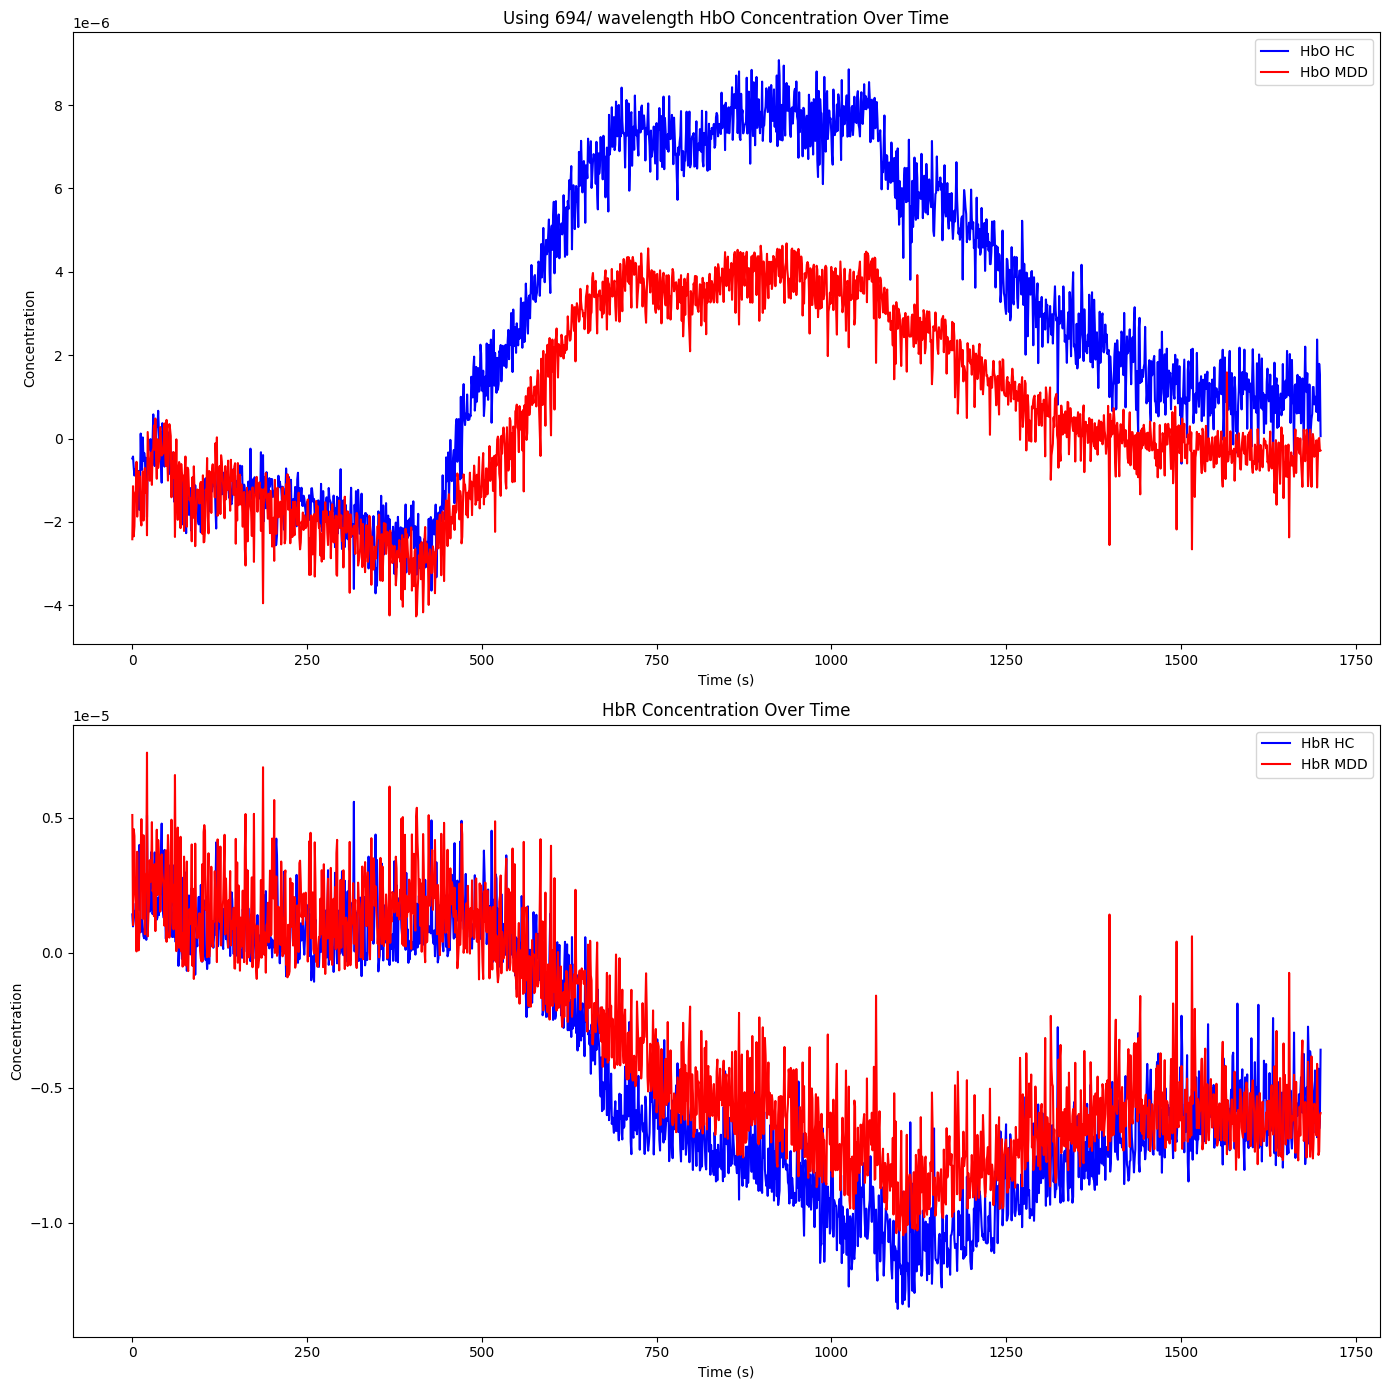

In [5]:
import matplotlib.pyplot as plt
import numpy as np



# Extract HbO and HbR results for HC and MDD
HbO_HC = results[labels == 0, ..., 0].mean(axis=(0, 1))
HbR_HC = results[labels == 0, ..., 1].mean(axis=(0, 1))

HbO_MDD = results[labels == 1, ..., 0].mean(axis=(0, 1))
HbR_MDD = results[labels == 1, ..., 1].mean(axis=(0, 1))

# Plot the results
plt.figure(figsize=(14, 14))

plt.subplot(2, 1, 1)
plt.plot(HbO_HC, label='HbO HC', color='blue')
plt.plot(HbO_MDD, label='HbO MDD', color='red')
plt.title('Using 694/ wavelength HbO Concentration Over Time')
plt.xlabel('Time (s)')
plt.ylabel('Concentration')
plt.legend()

plt.subplot(2, 1, 2)
plt.plot(HbR_HC, label='HbR HC', color='blue')
plt.plot(HbR_MDD, label='HbR MDD', color='red')
plt.title('HbR Concentration Over Time')
plt.xlabel('Time (s)')
plt.ylabel('Concentration')
plt.legend()

plt.tight_layout()
plt.show()


<tf.Variable 'epsilon_HbO_695:0' shape=() dtype=float32, numpy=298.00983>

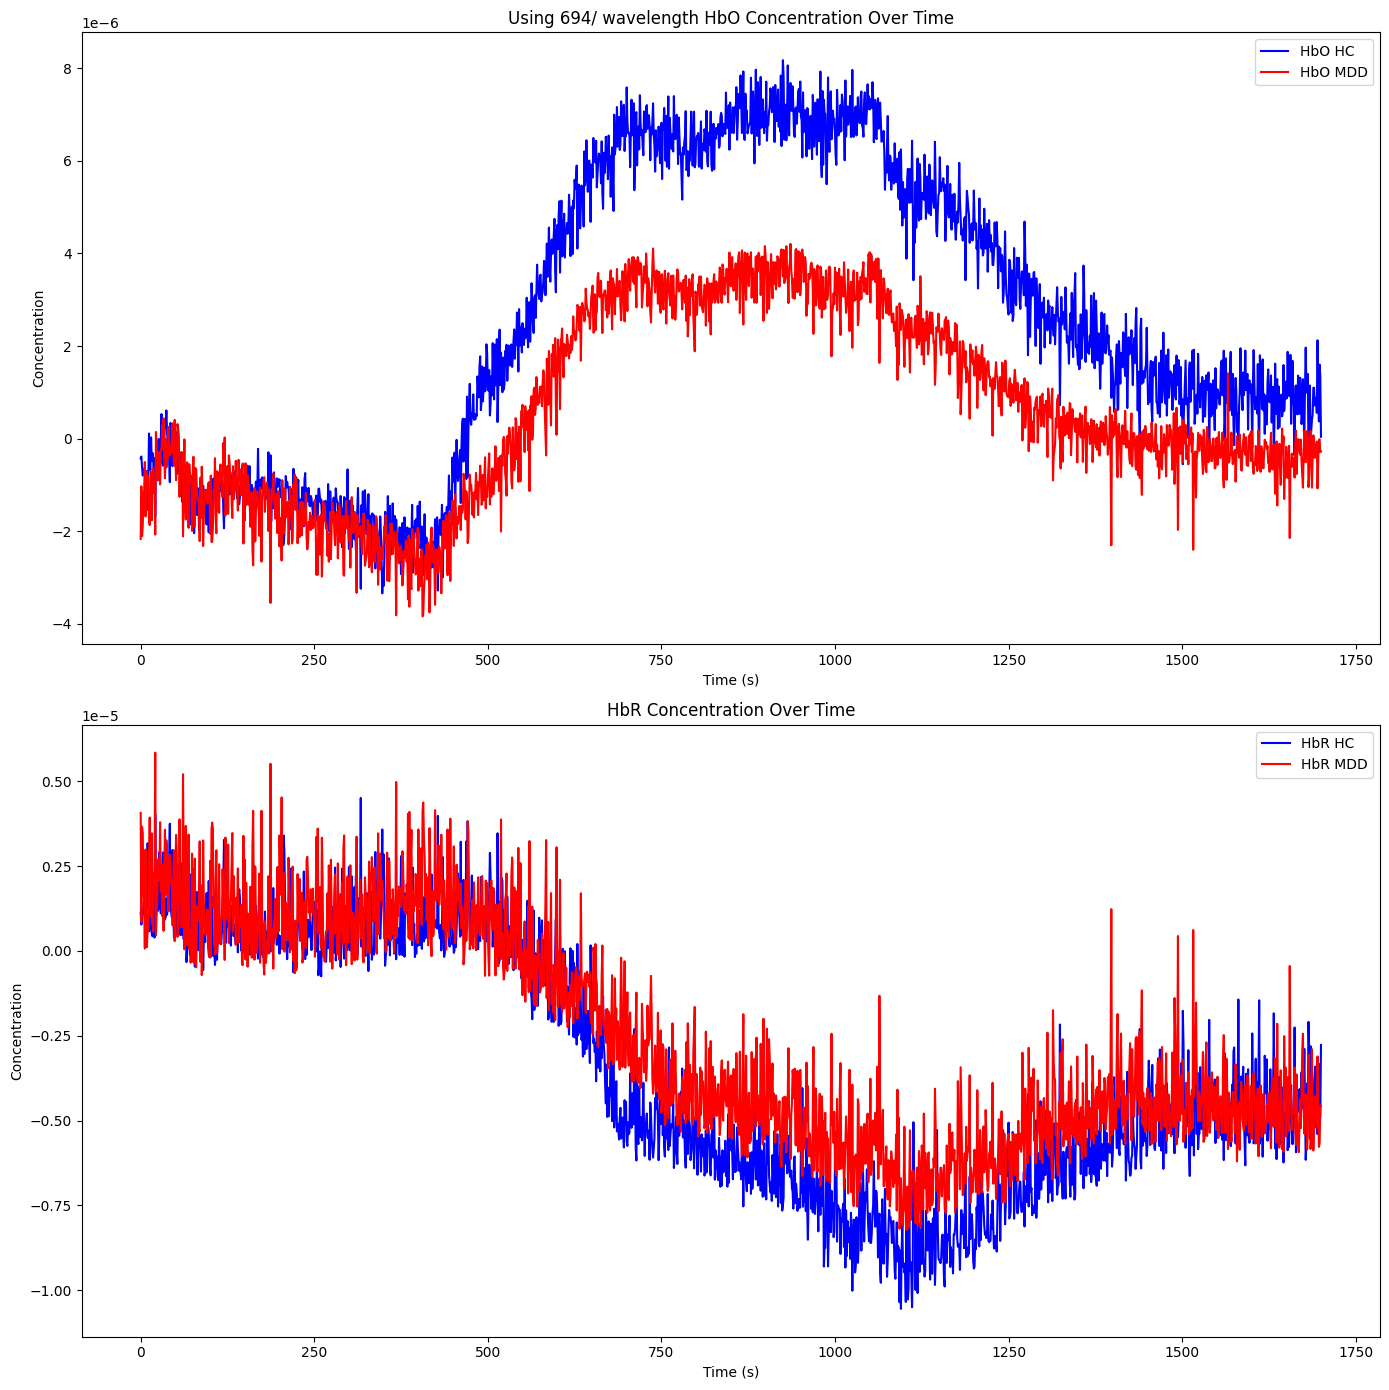

In [9]:
import matplotlib.pyplot as plt
import numpy as np



# Extract HbO and HbR results for HC and MDD
HbO_HC = results[labels == 0, ..., 0].mean(axis=(0, 1))
HbR_HC = results[labels == 0, ..., 1].mean(axis=(0, 1))

HbO_MDD = results[labels == 1, ..., 0].mean(axis=(0, 1))
HbR_MDD = results[labels == 1, ..., 1].mean(axis=(0, 1))

# Plot the results
plt.figure(figsize=(14, 14))

plt.subplot(2, 1, 1)
plt.plot(HbO_HC, label='HbO HC', color='blue')
plt.plot(HbO_MDD, label='HbO MDD', color='red')
plt.title('Using 694/ wavelength HbO Concentration Over Time')
plt.xlabel('Time (s)')
plt.ylabel('Concentration')
plt.legend()

plt.subplot(2, 1, 2)
plt.plot(HbR_HC, label='HbR HC', color='blue')
plt.plot(HbR_MDD, label='HbR MDD', color='red')
plt.title('HbR Concentration Over Time')
plt.xlabel('Time (s)')
plt.ylabel('Concentration')
plt.legend()

plt.tight_layout()
plt.show()
